# INSE 6630 Recent Developments in Information Systems Security - Group Project

---
Group Members:
- Rakshith Raj Gurupura Puttaraju  - 40235325
- Rahul Ravi Hulli - 40234542
- Mustafa Talha Ucar  - 40059335
- Anita Francis Archibong - 27729790
- Josephine Famiyeh - 40262544
---

This notebook is created for a team project in the INSE 6630 Recent Developments in Information Systems Security course at Concordia University, Montreal, Canada, in the fall semester of 2023. The purpose of the project is to analyze and compare a variety of machine learning techniques for their capability in detecting network intrusions, employing the KDD Cup'99 dataset for this analysis.

---

This notebook focuses on implementing classification using the Random Forest algorithm

In [1]:
# Loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading the Dataset

Preprocessing and dataset splitting have previously been performed in a separate notebook.


In [4]:
# Loading training and testing datasets
data_directory = "./data/"

# Load training data
x_train = pd.read_csv(data_directory + "kdd99_training_data.csv")

# Load testing data
x_test = pd.read_csv(data_directory + "kdd99_testing_data.csv")

# Load training labels and convert them to strings
y_train = pd.read_csv(data_directory + "kdd99_training_labels.csv")["label"].astype(str)

# Load testing labels and convert them to strings
y_test = pd.read_csv(data_directory + "kdd99_testing_labels.csv")["label"].astype(str)

# Ensure that the training features are also treated as strings
x_train = x_train.astype(str)

# Print shape information and unique labels in the training dataset
print(f"Shape of training dataset: {x_train.shape}")
print(f"Shape of testing dataset: {x_test.shape}")
print(f"Unique labels in the training dataset: {y_train.unique()}")


Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)
Unique labels in the training dataset: ['normal' 'dos' 'r2l' 'probe' 'u2r']


## Training the model

In [5]:
# Initialize the Random Forest Classifier with 100 estimators
random_forest_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
random_forest_classifier.fit(x_train, y_train)

# Make predictions on the testing data
predictions = random_forest_classifier.predict(x_test)


## Evaluating the model

In [7]:
# Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

# Print the classification report
classification_report = classification_report(y_test, predictions)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix)
print("\nClassification Report:")
print(classification_report)


Confusion Matrix:
[[97672     4     0     0     0]
 [    1 24479     1     0     1]
 [    0     7  1049     0     0]
 [    0     5     0   273     1]
 [    0     1     0     0    11]]

Classification Report:
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       1.00      0.99      1.00      1056
         r2l       1.00      0.98      0.99       279
         u2r       0.85      0.92      0.88        12

    accuracy                           1.00    123505
   macro avg       0.97      0.98      0.97    123505
weighted avg       1.00      1.00      1.00    123505



In [8]:
# Define the labels for the confusion matrix annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']

# Initialize an empty list for annotations
annotations = []

# Iterate through the label combinations and populate the annotations list
for true_label in y_labels:
    for predicted_label in y_labels:
        i = y_labels.index(true_label)
        j = y_labels.index(predicted_label)
        count = confusion_matrix[i, j]
        annotation = f"Real {true_label}\nPredicted {predicted_label}\n{count}"
        annotations.append(annotation)

# Reshape the annotations into a 5x5 matrix
annotations = np.array(annotations).reshape(5, 5)


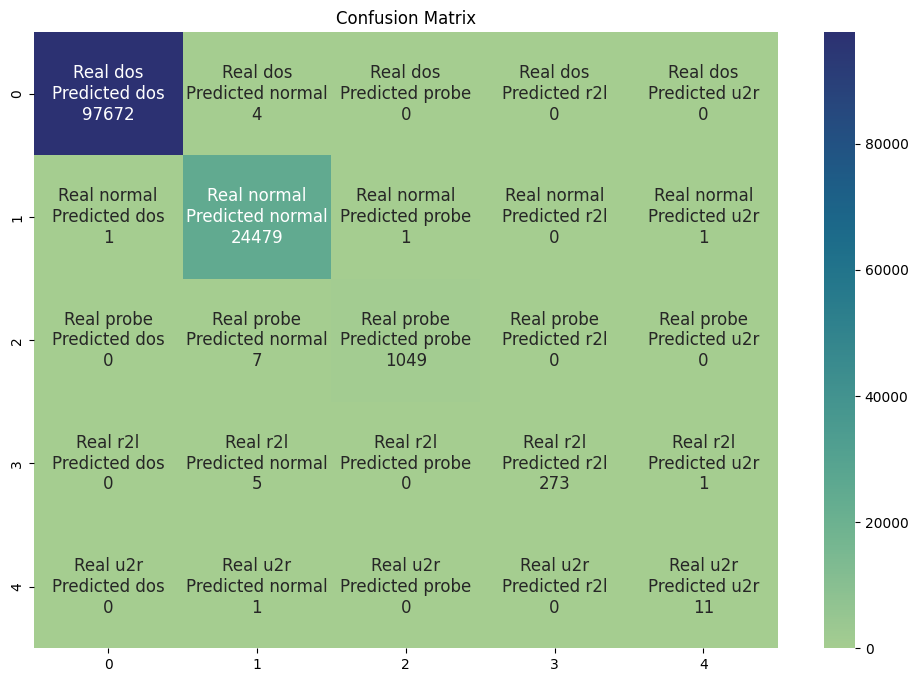

In [10]:
# Visualization of the confusion matrix 

# Set the figure size and title
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")

# Create a heatmap of the confusion matrix with annotations
sns.heatmap(confusion_matrix, annot=annotations, cmap='crest', fmt='', annot_kws={"fontsize": 12})

# Show the heatmap
plt.show()


## Conclusion

The model achieved remarkable overall prediction results, with the following key metrics:

- **Accuracy:** 1.00
- **Precision (Weighted Avg):** 1.00
- **Recall (Weighted Avg):** 1.00
- **F1-score (Weighted Avg):** 1.00

Notably, the model demonstrated exceptional recall for the 'R2L' category at 98%. However, its performance in the 'U2R' category showed lower recall at 58%.
